## Dog Breed Classification

### 1 Introduction

**In this case study I will be trying to identify breed of a dog given an image of the dog. I will try to solve this problem using deep learning and machine learning techniques. This is a fined grained classification problem i.e. all the dogs share the same structure and body features so differentiating between breeds is a difficult problem. Also there is less inter breed and more intra breed variations i.e. with minimal change in bodily features the dogs differ in breed. Also in the same breed there are high variations with different fur colour, size and image orientations. Considering all these things it makes our task more difficult.**

### 2. Useful Links

**1. Data: https://www.kaggle.com/c/dog-breed-identification/data,http://vision.stanford.edu/aditya86/ImageNetDogs/**


**2. Blog 1: https://towardsdatascience.com/dog-breed-classification-hands-on-approach-b5e4f88c333e**


**3. Research Paper 1: https://arxiv.org/pdf/1409.4842v1.pdf , https://arxiv.org/pdf/1512.00567v3.pdf**


**4. Research Paper 2: https://arxiv.org/pdf/2010.11929.pdf , https://www.analyticsvidhya.com/blog/2021/03/an-image-is-worth-16x16-words-transformers-for-image-recognition-at-scale-vision-transformers/**


**5. Blog 2:http://jalammar.github.io/illustrated-transformer/**


**6. Research Paper 3: https://arxiv.org/pdf/2107.02341v2.pdf**

### 3. Data

**For this problem we will consider the data collected by Stanford Dogs dataset . This dataset contains total of 20,580 images of dogs varying across 120 dog breeds. There are roughly 200 images per breed. The dataset is well varied from breeds across the globe. This dataset has been built using images from Image net for the task of fine grained image categorisation. We will be downloading our data from the kaggle problem from here https://www.kaggle.com/c/dog-breed-identification/data . The data has been taken from Stanford dataset and has the following files. It contains a Train folder with 10222 images of dogs which can be used for training. The Test folder contains about 10357 images for testing. The labels.csv file contains the 10222 values with class labels for each training data image.**

### 4. Evaluation Metric

**1. Cross Entropy Loss**

**2. Confusion Matrix**

### 5. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -u '/content/drive/MyDrive/dog-breed-identification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [8]:
labels = pd.read_csv('labels.csv')
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [9]:
labels.shape

(10222, 2)

#### Adding additional features to Data frame

In [4]:
def add_features():
    '''This function adds additional features to our train data e.g. Width,height,mean
    pixel value'''
    path = os.path.join(os.getcwd(),'train')
    height = []
    width = []
    mean_pixel = []
    for name in tqdm(labels['id'].values):
        img = cv2.imread(os.path.join(path,name+'.jpg'))
        height.append(img.shape[0])
        width.append(img.shape[1])
        mean_pixel.append(np.mean(img))
        
    labels['height'] = height
    labels['width'] = width
    labels['mean_pixel'] = mean_pixel

In [10]:
add_features()

100%|██████████| 10222/10222 [00:37<00:00, 274.41it/s]


In [ ]:
labels.head()

,id,breed,height,width,mean_pixel
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,375,500,112.946974
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,375,500,79.214320
2,001cdf01b096e06d78e9e5112d419397,pekinese,375,500,114.206996
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,344,400,118.813045
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,500,500,99.831579


**There are no null objects in our dataset**

#### Distrbution of breed

In [11]:
unique_breeds = np.unique(labels['breed'].values)
len(unique_breeds)

120

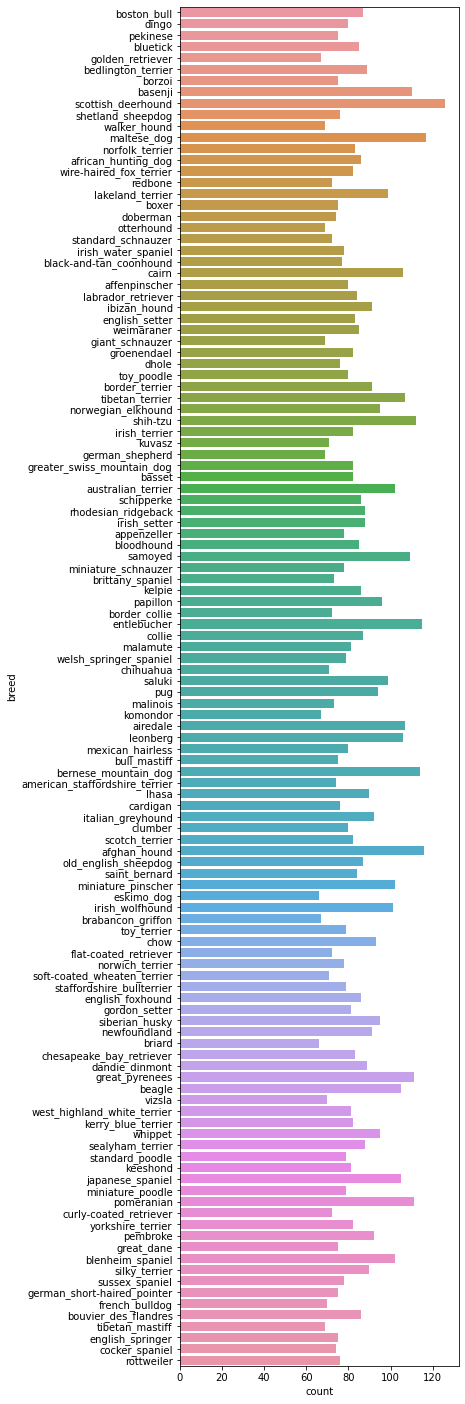

In [26]:
plt.figure(figsize=(5,25))
sns.countplot(y='breed',data=labels,orient="h")
plt.show()

In [ ]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

**The distribution between different classes seems to be quite balanced.Minium number of datapoints being 66 and maximum being 126**

#### Image sizes

In [ ]:
def percentiles(data,low,high,step):
    '''this function prints the percentile between low and high with step size'''
    for i in np.arange(low,high,step):
        if(i <= 100):
            print('{} th percentile is: {}'.format(np.round(i,1),np.percentile(data,i)))

Text(0.5, 0, 'Height in Pixels')

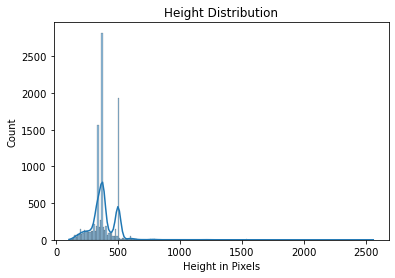

In [ ]:
sns.histplot(labels['height'],kde=True)
plt.title('Height Distribution')
plt.xlabel('Height in Pixels')

**Height of most of the images are near to 300 pixels , there are many of images having height of 500 also**

In [ ]:
'''Percentiles for height'''
percentiles(labels['height'],10,101,10)

10 th percentile is: 260.0
20 th percentile is: 332.0
30 th percentile is: 333.0
40 th percentile is: 374.0
50 th percentile is: 375.0
60 th percentile is: 375.0
70 th percentile is: 400.0
80 th percentile is: 500.0
90 th percentile is: 500.0
100 th percentile is: 2562.0


In [ ]:
percentiles(labels['height'],99,101,0.1)

99.0 th percentile is: 773.3699999999972
99.1 th percentile is: 800.0
99.2 th percentile is: 830.9439999999686
99.3 th percentile is: 926.6839999999866
99.4 th percentile is: 1018.4579999999532
99.5 th percentile is: 1179.6899999999296
99.6 th percentile is: 1230.2319999999927
99.7 th percentile is: 1431.7289999999302
99.8 th percentile is: 1536.0
99.9 th percentile is: 1704.0
100.0 th percentile is: 2561.999999999378


**90% of images in our data has height less than 500. Based on our compute power we can select to resize our images to 500 or less height. If we see our distribution plot we can see that most of our images have height of approx 300, we can select this as our number**

Text(0.5, 0, 'Width in Pixels')

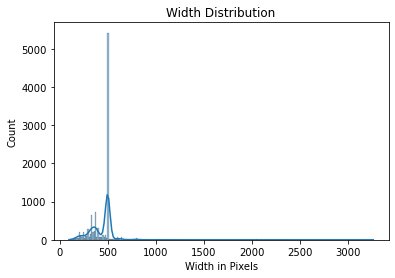

In [ ]:
sns.histplot(labels['width'],kde=True)
plt.title('Width Distribution')
plt.xlabel('Width in Pixels')

**Width of most images are near 500 pixels**

In [ ]:
percentiles(labels['width'],10,101,10)

10 th percentile is: 288.0
20 th percentile is: 334.0
30 th percentile is: 375.0
40 th percentile is: 453.0
50 th percentile is: 500.0
60 th percentile is: 500.0
70 th percentile is: 500.0
80 th percentile is: 500.0
90 th percentile is: 500.0
100 th percentile is: 3264.0


In [ ]:
percentiles(labels['width'],99,101,0.1)

99.0 th percentile is: 800.0
99.1 th percentile is: 817.1320000000051
99.2 th percentile is: 886.1759999999667
99.3 th percentile is: 963.1709999999966
99.4 th percentile is: 1024.0
99.5 th percentile is: 1198.7399999999616
99.6 th percentile is: 1284.2919999998649
99.7 th percentile is: 1600.0
99.8 th percentile is: 2048.0
99.9 th percentile is: 2151.358999999895
100.0 th percentile is: 3264.0


**Most of our images width is around 500 pixels. seeing at the data we can try to use different image sizes eg (256,256),(300,300),(400,400) with upper limit of 500 for both width and height.**

Text(0.5, 0, 'Mean of Pixel values per image ')

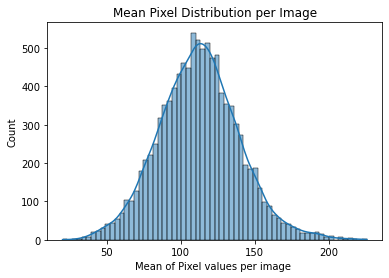

In [ ]:
sns.histplot(labels['mean_pixel'],kde=True)
plt.title('Mean Pixel Distribution per Image')
plt.xlabel('Mean of Pixel values per image ')

**average pixel values in our images follows a normal distribution with mean about 100.**

#### Mean Image of entire Dataset

In [ ]:
def mean_image(data,size,n):
    '''this fuction plots the mean image of given data of dimension (size,size)'''
    path = os.path.join(os.getcwd(),'train')
    m_image = []
    len_data = len(data)
    for name in tqdm(data):
        img = cv2.imread(os.path.join(path,name+'.jpg'))
        img = cv2.resize(img,(size,size),interpolation= cv2.INTER_NEAREST)
        m_image.append(img)
    m_image = np.mean(m_image,axis=0)
    cv2.imwrite(n+'.jpg',m_image)



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10222/10222 [00:18<00:00, 558.80it/s]


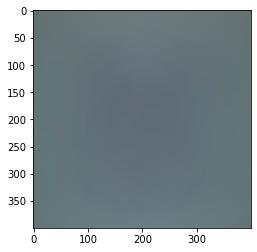

In [ ]:
mean_image(labels['id'].values,400,'mean')
img = cv2.imread('mean.jpg')
plt.imshow(img)

**Mean image does not tell much, but we can say that our dogs are centerd in the image and the colour of dogs are on darker side**

#### Looking at images from same breeds

Dogs for breed golden_retriever


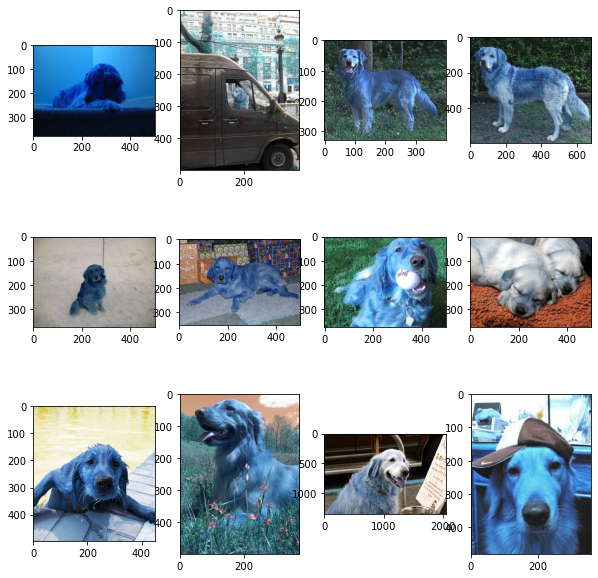

In [ ]:
'''Here we are going to plot some images from same breed'''
breed = np.random.choice(unique_breeds)
samples = labels[labels['breed'] == breed].sample(n=12)
print('Dogs for breed {}'.format(breed))
plt.figure(figsize=(10,10))
for i,name in enumerate(samples['id'].values):
    img = cv2.imread(os.path.join(os.getcwd(),'train',name+'.jpg'))
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 364.61it/s]


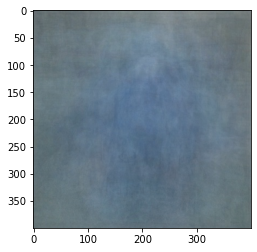

In [ ]:
'''Getting mean image for this class of breed'''
mean_image(labels[labels['breed'] == breed]['id'].values,400, breed+'_mean')
img = cv2.imread(breed+'_mean.jpg')
plt.imshow(img)

**The Dogs with same breed also seems to be quite different because of different colours or image representations, which makes our task quite challenging. Also looking at the mean image of this breed its clear that the dog color is sort of blue and is well centered in the pic**

Dogs for breed standard_poodle


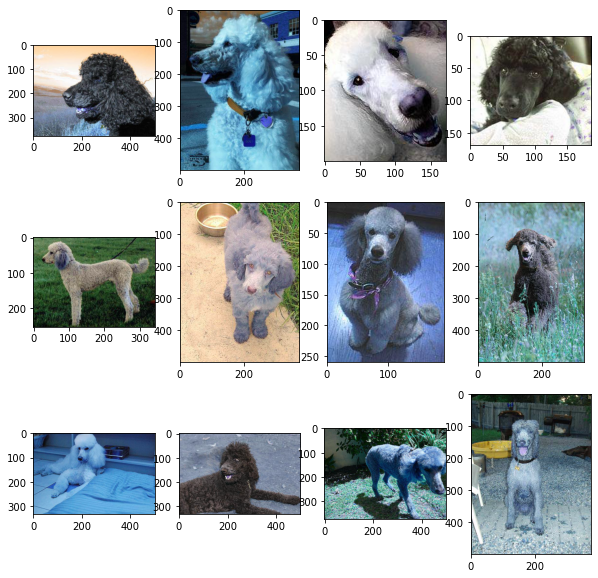

In [ ]:
'''Here we are going to plot some images from same breed'''
breed = np.random.choice(unique_breeds)
samples = labels[labels['breed'] == breed].sample(n=12)
print('Dogs for breed {}'.format(breed))
plt.figure(figsize=(10,10))
for i,name in enumerate(samples['id'].values):
    img = cv2.imread(os.path.join(os.getcwd(),'train',name+'.jpg'))
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 447.28it/s]


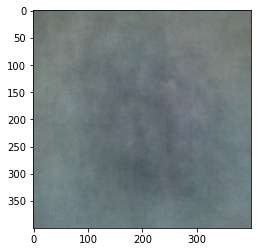

In [ ]:
'''Getting mean image for this class of breed'''
mean_image(labels[labels['breed'] == breed]['id'].values,400, breed+'_mean')
img = cv2.imread(breed+'_mean.jpg')
plt.imshow(img)

**This breed mean pic does not tell much . the color is also not well concenterated suggesting that the pics might be of different scales . As shown in images also the color of pics are varying and hence we cant tell much from mean pic.**

#### Looking at images of differnt breed

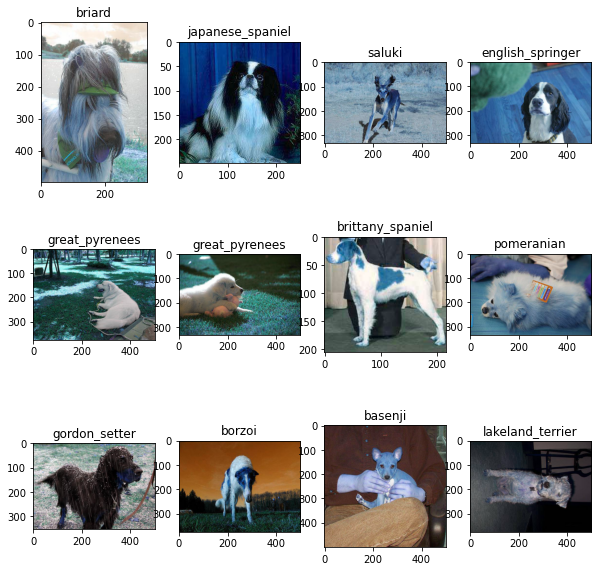

In [ ]:
'''Here we are going to plot some images from different breed'''
breed = 'shuffle'
samples = labels.sample(n=12)
plt.figure(figsize=(10,10))
for i,name in enumerate(samples['id'].values):
    img = cv2.imread(os.path.join(os.getcwd(),'train',name+'.jpg'))
    plt.subplot(3,4,i+1)
    plt.title(samples.iloc[i]['breed'])
    plt.imshow(img)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 278.86it/s]


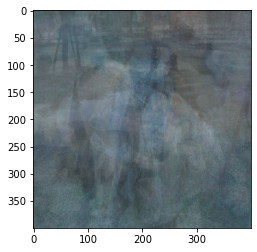

In [ ]:
'''Getting mean image for this class of breed'''
mean_image(samples['id'].values,400, breed+'_mean')
img = cv2.imread(breed+'_mean.jpg')
plt.imshow(img)

**Dogs of different breeds have also got similarities which increaases the challenges in our task. In the mean image as expected we dont see any information since we are dealing with inter breeds**

#### Very confusing breed Norfolk Terriers vs Norwich Terriers

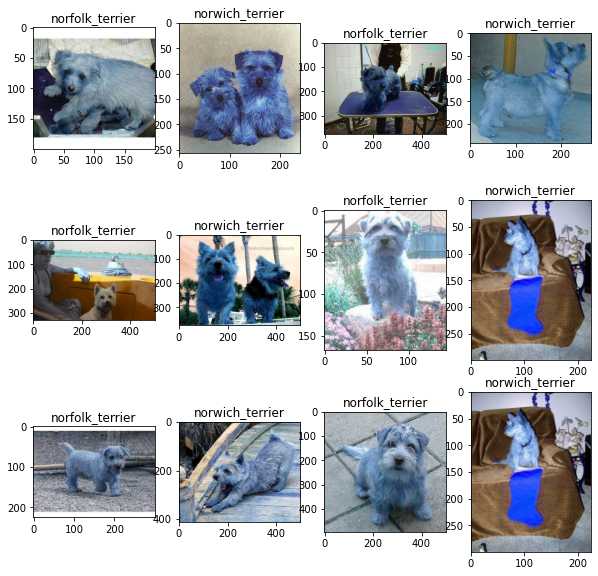

In [ ]:
'''Plotting images of a confusing data point'''
plt.figure(figsize=(10,10))
for i in range(12):
    if(i%2 == 0):
        sample = labels[labels['breed'] == 'norfolk_terrier' ].sample()
        name = sample['id'].values[0]
    else: 
        sample = labels[labels['breed'] == 'norwich_terrier' ].sample()
        name = sample['id'].values[0]
    
    img = cv2.imread(os.path.join(os.getcwd(),'train',name+'.jpg'))
    plt.subplot(3,4,i+1)
    plt.title(sample['breed'].values[0])
    plt.imshow(img)

**These two breeds of dogs are very confusing to differentiate**

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<00:00, 504.19it/s]


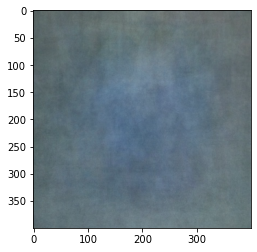

In [ ]:
'''Mean pixel for norwich_terrier'''
img = mean_image(labels[labels['breed']=='norwich_terrier']['id'].values,400,'norwich')
img = cv2.imread('norwich.jpg')
plt.imshow(img)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 485.43it/s]


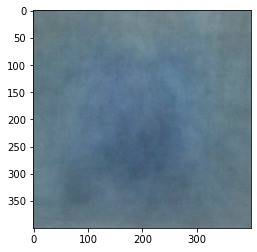

In [ ]:
'''Mean pixel for norfolk_terrier'''
img = mean_image(labels[labels['breed']=='norfolk_terrier']['id'].values,400,'norfolk')
img = cv2.imread('norfolk.jpg')
plt.imshow(img)

**Looking at their mean images also we can say that they are very confusing and hard to differentiate as both shares same colour,body structure.**

**There are many such breeds in our dataset that resemble to each other, hence we can consider our problem as Fine Grain classification problem. Our model has to be trained specifically to extract fine features from the images inorder to differentiate between them.**